In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')

In [2]:
le = LabelEncoder()

In [3]:
df = pd.read_csv('games_march2025_full.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     94948 non-null  int64  
 1   name                      94946 non-null  object 
 2   release_date              94948 non-null  object 
 3   required_age              94948 non-null  int64  
 4   price                     94948 non-null  float64
 5   dlc_count                 94948 non-null  int64  
 6   detailed_description      89522 non-null  object 
 7   about_the_game            89499 non-null  object 
 8   short_description         89599 non-null  object 
 9   reviews                   10428 non-null  object 
 10  header_image              94948 non-null  object 
 11  website                   41194 non-null  object 
 12  support_url               44185 non-null  object 
 13  support_email             78848 non-null  object 
 14  window

In [5]:
df.shape

(94948, 47)

In [6]:
df.isna().sum()

appid                           0
name                            2
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description         5426
about_the_game               5449
short_description            5349
reviews                     84520
header_image                    0
website                     53754
support_url                 50763
support_email               16100
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              91372
achievements                    0
recommendations                 0
notes                       78296
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
categories                      0
genres                          0
screenshots   

In [7]:
# df['metacritic_score'].value_counts().reset_index().head(50)

In [8]:
cols_to_drop = ['header_image', 'website', 'support_url', 'support_email', 'notes', 'packages', 'screenshots',
                'movies', 'user_score','score_rank','tags', ]
df = df.drop(columns=cols_to_drop)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     94948 non-null  int64  
 1   name                      94946 non-null  object 
 2   release_date              94948 non-null  object 
 3   required_age              94948 non-null  int64  
 4   price                     94948 non-null  float64
 5   dlc_count                 94948 non-null  int64  
 6   detailed_description      89522 non-null  object 
 7   about_the_game            89499 non-null  object 
 8   short_description         89599 non-null  object 
 9   reviews                   10428 non-null  object 
 10  windows                   94948 non-null  bool   
 11  mac                       94948 non-null  bool   
 12  linux                     94948 non-null  bool   
 13  metacritic_score          94948 non-null  int64  
 14  metacr

In [10]:
df.isna().sum()

appid                           0
name                            2
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description         5426
about_the_game               5449
short_description            5349
reviews                     84520
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              91372
achievements                    0
recommendations                 0
supported_languages             0
full_audio_languages            0
developers                      0
publishers                      0
categories                      0
genres                          0
positive                        0
negative                        0
estimated_owners                0
average_playtime_forever        0
average_playtime_2weeks         0
median_playtime_forever         0
median_playtim

In [11]:
df['name'] = df['name'].fillna('Unknown')
df['detailed_description'] = df['detailed_description'].fillna('Unknown')
df['about_the_game'] = df['about_the_game'].fillna('Unknown')
df['short_description'] = df['short_description'].fillna('Unknown')
df['reviews'] = df['reviews'].fillna('Unknown')
df['metacritic_url'] = df['metacritic_url'].fillna("missing")

In [12]:
df.isna().sum()

appid                       0
name                        0
release_date                0
required_age                0
price                       0
dlc_count                   0
detailed_description        0
about_the_game              0
short_description           0
reviews                     0
windows                     0
mac                         0
linux                       0
metacritic_score            0
metacritic_url              0
achievements                0
recommendations             0
supported_languages         0
full_audio_languages        0
developers                  0
publishers                  0
categories                  0
genres                      0
positive                    0
negative                    0
estimated_owners            0
average_playtime_forever    0
average_playtime_2weeks     0
median_playtime_forever     0
median_playtime_2weeks      0
discount                    0
peak_ccu                    0
pct_pos_total               0
num_review

In [13]:
df.head()

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",Unknown,...,33189,879,5174,350,0,1212356,86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,Unknown,...,0,0,0,0,0,616738,59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,43031,1536,898,892,0,555977,81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,Unknown,...,19323,771,7101,74,0,117698,87,1803832,92,17517
4,488824,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",Unknown,...,0,0,0,0,0,0,84,1168404,76,13017


In [14]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
print(df['release_date'].head())

0   2012-08-21
1   2017-12-21
2   2013-07-09
3   2015-04-13
4   2015-12-01
Name: release_date, dtype: datetime64[ns]


In [15]:
df['name'] = df['name'].str.replace(r'[®™]', '', regex=True).str.strip()
df['name'].head(5)

0                  Counter-Strike 2
1               PUBG: BATTLEGROUNDS
2                            Dota 2
3         Grand Theft Auto V Legacy
4    Tom Clancy's Rainbow Six Siege
Name: name, dtype: object

In [16]:
df['genres'].unique()

array(["['Action', 'Free To Play']",
       "['Action', 'Adventure', 'Massively Multiplayer', 'Free To Play']",
       "['Action', 'Strategy', 'Free To Play']", ...,
       "['Action', 'Indie', 'Simulation', 'Education', 'Game Development']",
       "['Design & Illustration', 'Education', 'Game Development']",
       "['Violent', 'Action', 'Early Access']"], dtype=object)

In [17]:
df['genres'] = df['genres'].str.replace('[', '').str.replace(']', '')
df['genres']

0                                 'Action', 'Free To Play'
1        'Action', 'Adventure', 'Massively Multiplayer'...
2                     'Action', 'Strategy', 'Free To Play'
3                                    'Action', 'Adventure'
4                                                 'Action'
                               ...                        
94943                              'Indie', 'Early Access'
94944           'Action', 'Adventure', 'Indie', 'Strategy'
94945                              'Indie', 'Early Access'
94946         'Adventure', 'RPG', 'Simulation', 'Strategy'
94947                                    'Action', 'Indie'
Name: genres, Length: 94948, dtype: object

In [18]:
df['estimated_owners'].unique

<bound method Series.unique of 0        100000000 - 200000000
1         50000000 - 100000000
2        200000000 - 500000000
3         50000000 - 100000000
4                    0 - 20000
                 ...          
94943                0 - 20000
94944                0 - 20000
94945                0 - 20000
94946                0 - 20000
94947                0 - 20000
Name: estimated_owners, Length: 94948, dtype: object>

In [19]:
# # split it to single number 
df[['lower_bound', 'upper_bound']] = df['estimated_owners'].str.split(' - ', expand=True)

df['lower_bound'] = pd.to_numeric(df['lower_bound'], errors='coerce')
df['upper_bound'] = pd.to_numeric(df['upper_bound'], errors='coerce')

df['avg_estimated_owners'] = (df['lower_bound'] + df['upper_bound']) / 2

df = df.drop(columns=['estimated_owners','lower_bound', 'upper_bound'])

In [20]:
df['avg_estimated_owners'].head(10)

0    150000000.0
1     75000000.0
2    350000000.0
3     75000000.0
4        10000.0
5        10000.0
6        10000.0
7        10000.0
8     35000000.0
9     35000000.0
Name: avg_estimated_owners, dtype: float64

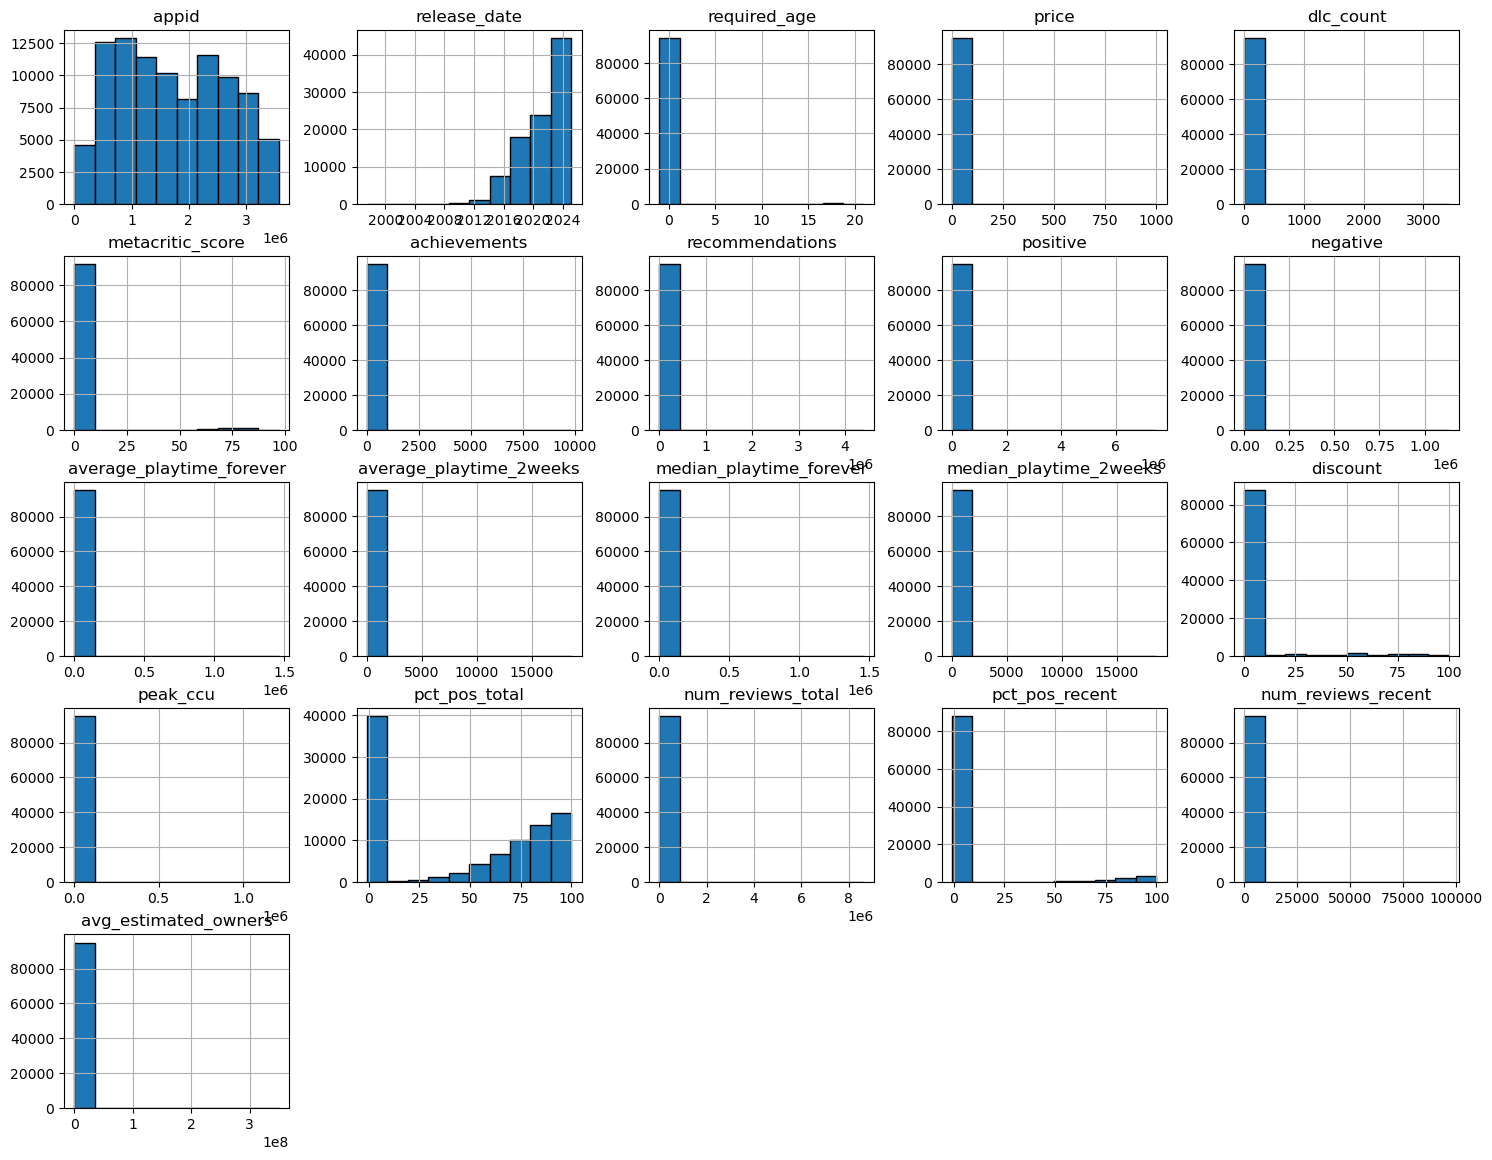

In [21]:
df.hist(figsize = ( 18, 14 ), edgecolor='black')
plt.show()

In [22]:
game=df['avg_estimated_owners'].idxmax()
find_game=df.loc[game]
print(find_game)

appid                                                                     570
name                                                                   Dota 2
release_date                                              2013-07-09 00:00:00
required_age                                                                0
price                                                                     0.0
dlc_count                                                                   2
detailed_description        The most-played game on Steam. Every day, mill...
about_the_game              The most-played game on Steam. Every day, mill...
short_description           Every day, millions of players worldwide enter...
reviews                     “A modern multiplayer masterpiece.” 9.5/10 – D...
windows                                                                  True
mac                                                                      True
linux                                                           

<Axes: >

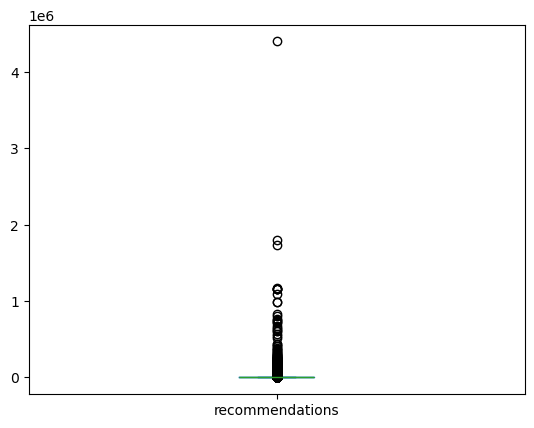

In [23]:
df.recommendations.plot(kind='box')

In [24]:
bins = [0, 1000, 10000, 100000, df['recommendations'].max()]
labels = ['None','Very Low','Medium','High']

df['rec_category'] = pd.cut(df['recommendations'], bins=bins, labels=labels)


<Axes: >

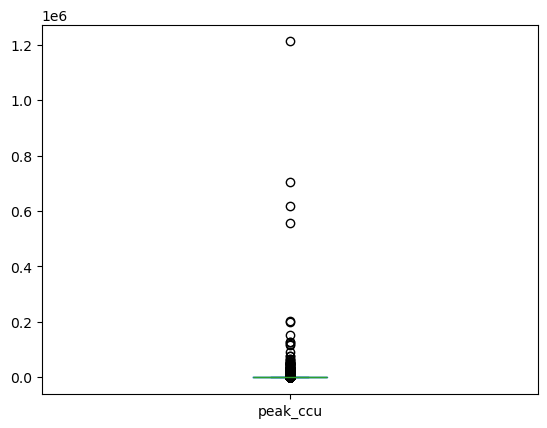

In [25]:
df.peak_ccu.plot(kind='box')

In [26]:
bins = [0, 100, 1000, 10000, df['peak_ccu'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High']

df['ccu_category'] = pd.cut(df['peak_ccu'], bins=bins, labels=labels)

In [27]:
df['ccu_category_encoded'] = le.fit_transform(df['ccu_category'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   appid                     94948 non-null  int64         
 1   name                      94948 non-null  object        
 2   release_date              94948 non-null  datetime64[ns]
 3   required_age              94948 non-null  int64         
 4   price                     94948 non-null  float64       
 5   dlc_count                 94948 non-null  int64         
 6   detailed_description      94948 non-null  object        
 7   about_the_game            94948 non-null  object        
 8   short_description         94948 non-null  object        
 9   reviews                   94948 non-null  object        
 10  windows                   94948 non-null  bool          
 11  mac                       94948 non-null  bool          
 12  linux             

In [29]:
df.loc[df['price'] > 100, 'price'] = np.nan

df = df[df['price'] <= 100]

In [30]:
print(df['price'].describe())

count    94764.000000
mean         6.524510
std          8.446199
min          0.000000
25%          0.990000
50%          3.990000
75%          9.990000
max         99.990000
Name: price, dtype: float64


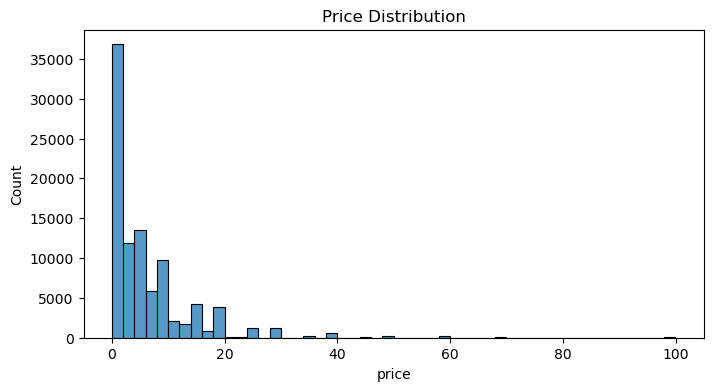

In [31]:
# show the game price 
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50)
plt.title('Price Distribution')
plt.show()

In [32]:
df['genre_encoded'] = le.fit_transform(df['genres'])
df['category_encoded'] = le.fit_transform(df['categories'])
df['publisher_encoded'] = le.fit_transform(df['publishers'])
df['supported_language_encoded'] = le.fit_transform(df['supported_languages'])
df['full_audio_language_encoded'] = le.fit_transform(df['full_audio_languages'])


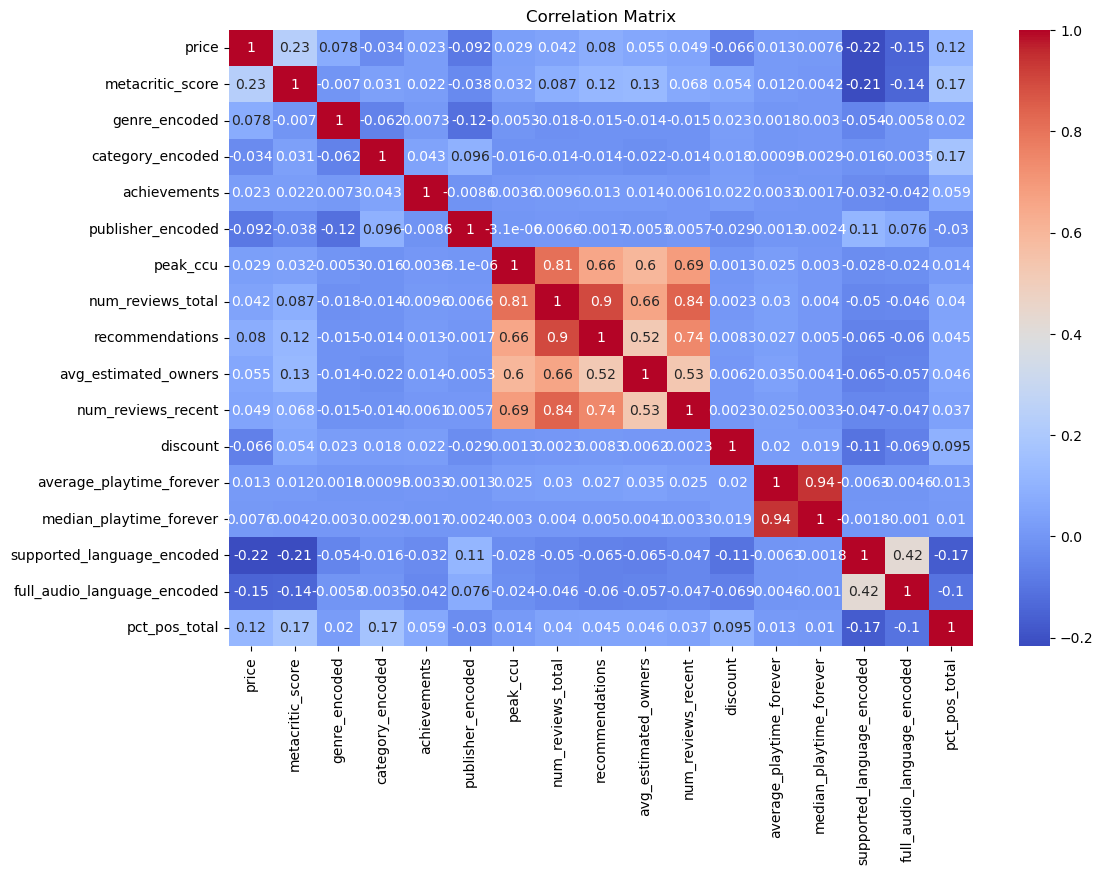

In [33]:
# the mean and std
plt.figure(figsize=(12,8))
corr = df[['price','metacritic_score','genre_encoded','category_encoded','achievements','publisher_encoded','peak_ccu','num_reviews_total','recommendations','avg_estimated_owners','num_reviews_recent','discount','average_playtime_forever','median_playtime_forever','supported_language_encoded','full_audio_language_encoded','pct_pos_total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
df.head()

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,num_reviews_recent,avg_estimated_owners,rec_category,ccu_category,ccu_category_encoded,genre_encoded,category_encoded,publisher_encoded,supported_language_encoded,full_audio_language_encoded
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",Unknown,...,96473,150000000.0,High,High,0,742,214,42480,6,1702
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,Unknown,...,16720,75000000.0,High,High,0,423,964,21076,10395,2880
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,29366,350000000.0,Medium,High,0,998,189,42480,2,1875
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,Unknown,...,17517,75000000.0,High,High,0,8,3329,33924,5675,2319
4,488824,Tom Clancy's Rainbow Six Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",Unknown,...,13017,10000.0,High,NaN,4,7,3266,41803,4017,1015


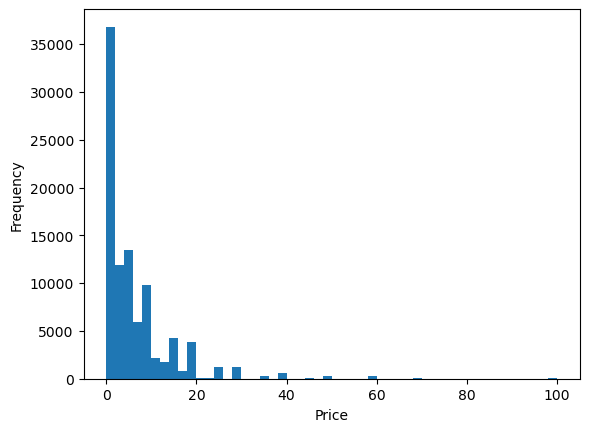

In [35]:
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [36]:
print(df['price'].skew())

3.0707813212135746


In [37]:
print(df['price'].mean())
print(df['price'].median())

6.524510362584949
3.99


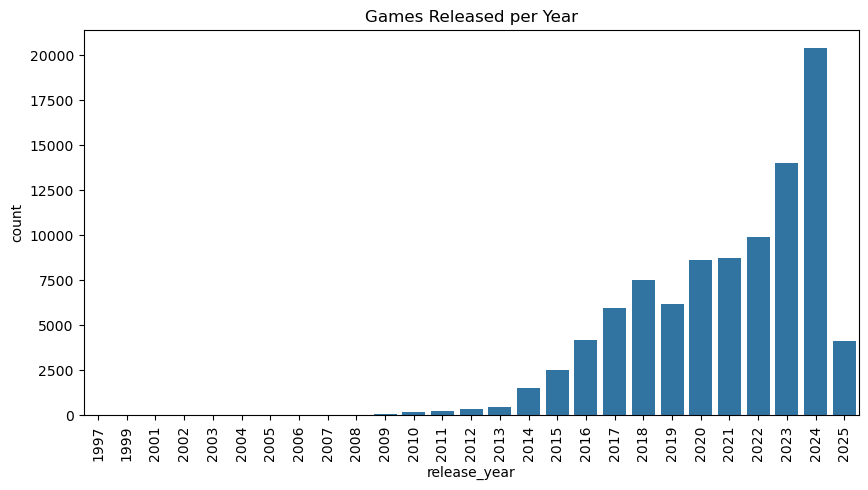

In [38]:
df['release_year'] = df['release_date'].dt.year
plt.figure(figsize=(10,5))
sns.countplot(x='release_year', data=df, order=sorted(df['release_year'].unique()))
plt.xticks(rotation=90)
plt.title('Games Released per Year')
plt.show()

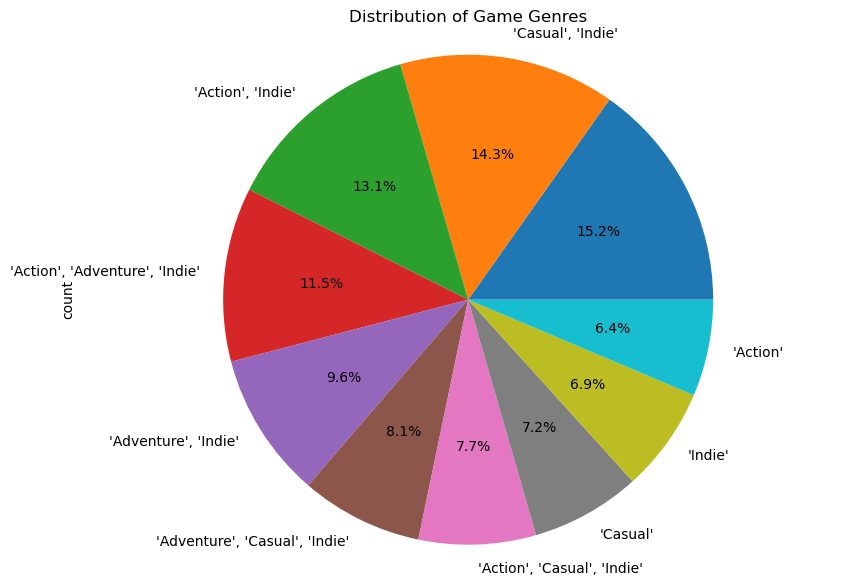

In [39]:
df['genres'] = df['genres'].astype(str)

genres_counts = df['genres'].value_counts().head(10)

plt.figure(figsize=(10, 7))
genres_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Game Genres')
plt.axis('equal')
plt.show()

In [40]:
df.to_csv('cleaned_steam_games.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94764 entries, 0 to 94947
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appid                        94764 non-null  int64         
 1   name                         94764 non-null  object        
 2   release_date                 94764 non-null  datetime64[ns]
 3   required_age                 94764 non-null  int64         
 4   price                        94764 non-null  float64       
 5   dlc_count                    94764 non-null  int64         
 6   detailed_description         94764 non-null  object        
 7   about_the_game               94764 non-null  object        
 8   short_description            94764 non-null  object        
 9   reviews                      94764 non-null  object        
 10  windows                      94764 non-null  bool          
 11  mac                          94764 non-null  b